## K-Nearest neighbors

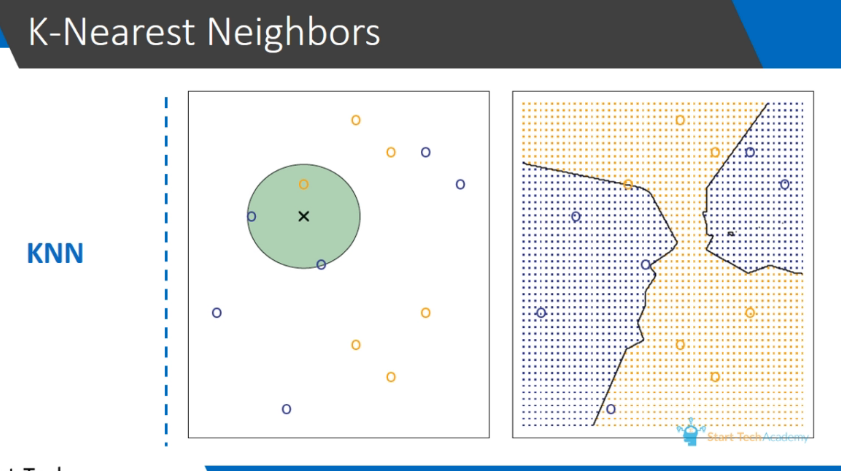

1. Lets say there are two predictor variables. One is on X axis and other is on y axis.
2. The yellow circle represents the one class of response variable and blue represents another class of a response variable.
3. Lets take a point X. We wish to classify this X to either blue or yellow class. If we take k =3 , we will take 3 nearest points and find the conditional prob of each points in the circle.
4. In this example, we mark it as blue.
5. If the number of class values are equal, then it will be assigned randomly

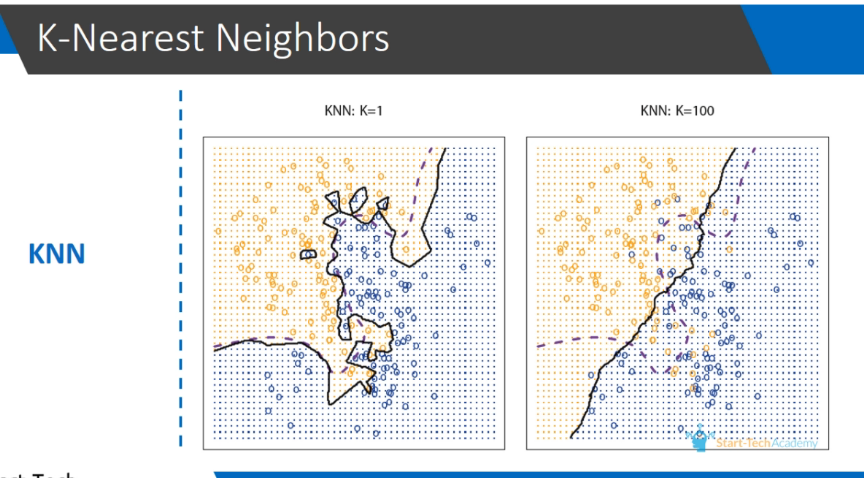

Lower K represents higher flexibilty

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("F:\\Codes\\Dataset\\Data Files\\2. ST Academy - Classification models resource files\\House_Price.csv", header=0)

In [8]:
X = df.loc[:,"price" :"waterbody_River"]

In [9]:
y = df['Sold']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn import preprocessing

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [15]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

## k=1

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[29, 29],
       [20, 24]], dtype=int64)

In [22]:
accuracy_score(y_test,clf_knn_1.predict(X_test_s))

0.5196078431372549

## k = 3

In [23]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
accuracy_score(y_test,clf_knn_3.predict(X_test_s))

0.5294117647058824

## creating single model for multiple values of k

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [28]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [43]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [44]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [45]:
optimised_KNN = grid_search_cv.best_estimator_

It has pick the best parameter. i.e 9 here

In [46]:
y_test_pred = optimised_KNN.predict(X_test_s)

In [47]:
confusion_matrix(y_test, y_test_pred)

array([[36, 22],
       [20, 24]], dtype=int64)

In [48]:
accuracy_score(y_test,y_test_pred)

0.5882352941176471

## Comparison between models

1. If it is non linear, then KNN performs better
2. If its linear then LDA or logistic regression performs better.
3. Between LDA and Logistic regression, LDA performs better when the dependent variable is distributed normally as we assumed in LDA model.
